<a href="https://colab.research.google.com/github/HaripraveenS/assignment-1/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls

drive  sample_data


In [1]:
import os
import cv2
from math import ceil,sqrt
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
IMAGES_FOLDER_PATH = "/content/drive/My Drive/images1/images/"
IMAGES_FOLDER_PATH1 = "/content/drive/My Drive/images/"


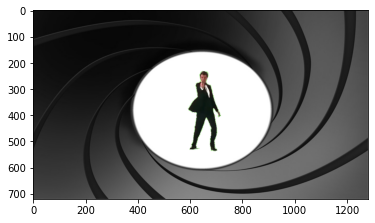

In [ ]:
img1 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "bg.jpg"))
img2 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "fg.jpg"))
# mask = cv2.inRange(img2, l_green, u_green) 
imgc = img2
imgc = cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB)
lower_blue = np.array([0, 100, 0])  
upper_blue = np.array([120, 255, 100]) 
mask = cv2.inRange(imgc, lower_blue, upper_blue)
maskimg = np.copy(imgc)
maskimg[mask != 0] = [0, 0, 0]
crob = img1
crob[mask == 0] = [0, 0, 0]
plt.imshow(crob)
final_image = crob + maskimg
plt.imshow(final_image)

(480, 1024, 3)


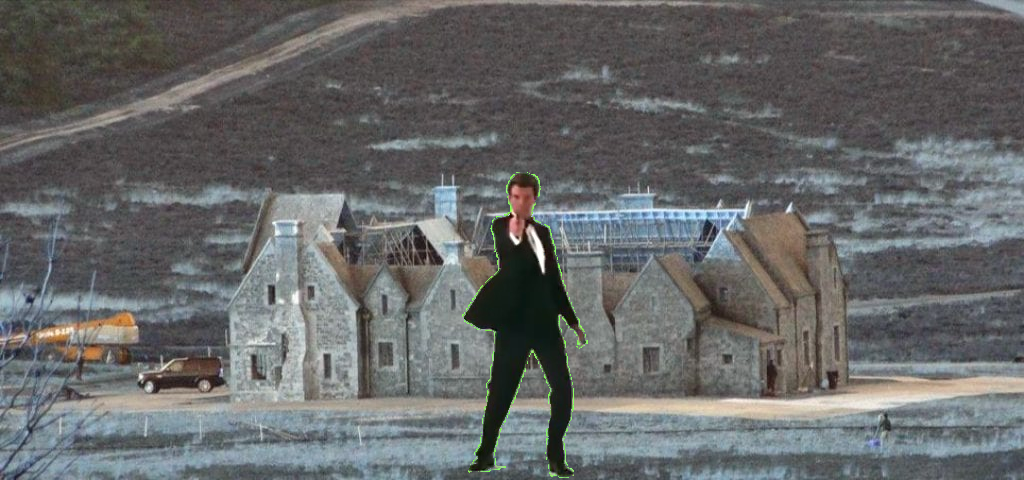

In [ ]:
img3 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "man1.jpg"))
print(img3.shape)
maskc = maskimg[60:540,130:1154]
imgc1 = img2[60:540,130:1154]
imgc1 = cv2.cvtColor(imgc1, cv2.COLOR_BGR2RGB)
mask1 = cv2.inRange(imgc1, lower_blue, upper_blue)
maskimg1 = np.copy(imgc1)
maskimg1[mask1 != 0] = [0, 0, 0]
# print(imgc1.shape)
# plt.imshow(maskimg1)
crob1 = img3
crob1[mask1 == 0] = [0, 0, 0]
# plt.imshow(crob1)
final_image1 = crob1 + maskimg1
# plt.imshow(final_image1)
cv2_imshow(cv2.cvtColor(final_image1, cv2.COLOR_BGR2RGB))

In [ ]:
pixels = 720 * 1280
tot_img = pixels * 3
storage_size = 4 * 1024 * 1024 * 1024
number_of_images = ceil(storage_size / tot_img)
print(number_of_images)

1554


In [ ]:
image_size = 168.75 * 1024 * 1024
number_of_pixels = image_size / 3
dimension = sqrt(number_of_pixels)
print(dimension)


7680.0


In [ ]:
def bitQuantizeImage(im,k):
  fact = 2 ** (8 - k)
  ret = (im // fact).astype(int)
  high = 2 **k - 1
  return ((255 * ret) // high)

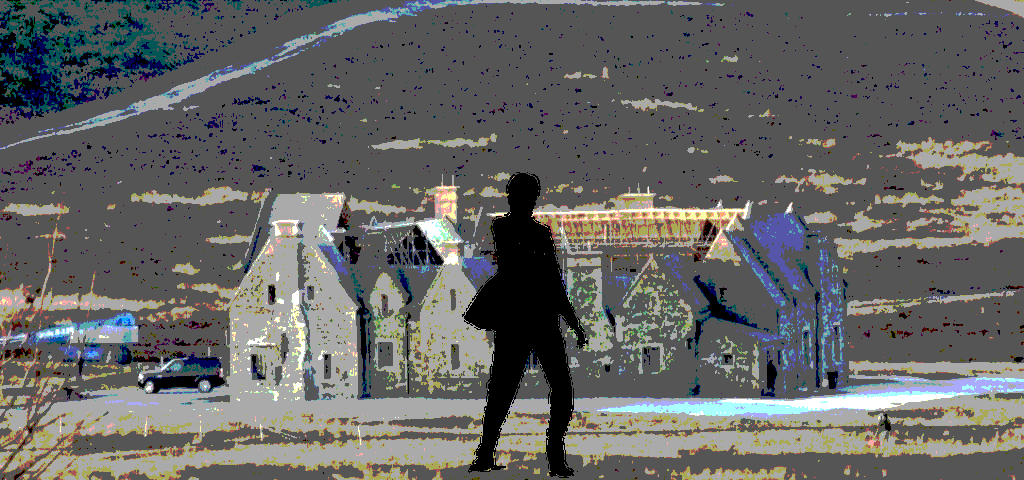

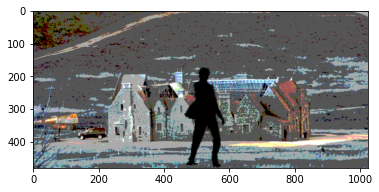

In [ ]:
img5 = bitQuantizeImage(img3,2)
import plotly.express as px
cv2_imshow(img5)
plt.imshow(img5)
# asdf.show()
# asd.show()

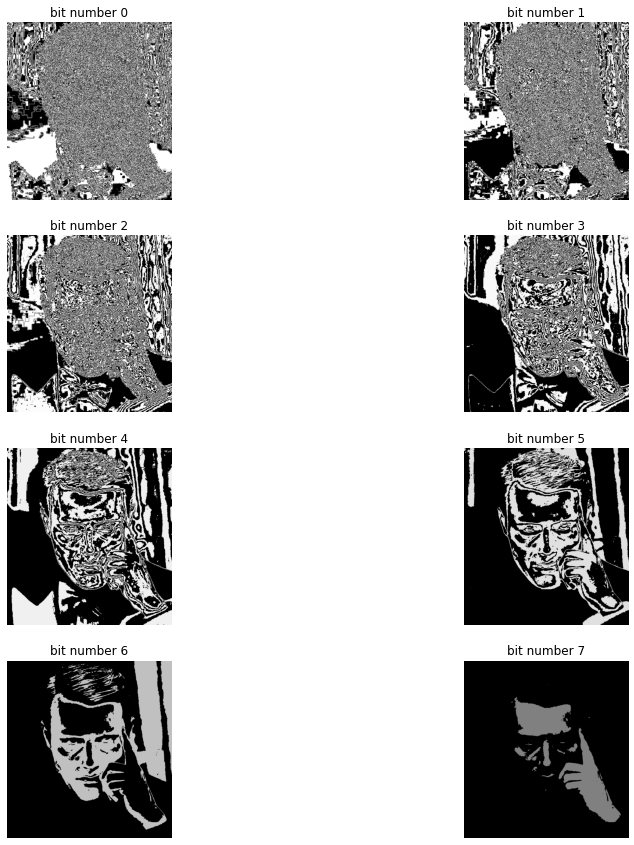

In [ ]:
test2 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH1, "007_test2.png"))
# cv2_imshow(img3);
test2_gray = cv2.cvtColor(test2, cv2.COLOR_BGR2GRAY)
fig, axes = plt.subplots(4,2,figsize=(15,15))
# axes[1].imshow(test2);
for i in range(4):
  for k in range(2):
    plane = np.full((test2_gray.shape[0], test2_gray.shape[1]), 2 ** (2*i + k), np.uint8)
    res = cv2.bitwise_and(plane, test2_gray)
    x = res * 255
    axes[i,k].set_title('bit number {}'.format(2*i + k))
    axes[i,k].imshow(x, cmap='gray', vmin=0, vmax=255);
    axes[i,k].axis('off')
  # cv2_imshow(x)
  # out.append(x)
plt.show()
# cv2.imshow("bit plane", np.hstack(out))

# 4.4
my roll number is 2018102031 . I have money penny as my corrupt image . I found the corruption to be conversion of image to grayscale and then inverting the image


(-0.5, 589.5, 349.5, -0.5)

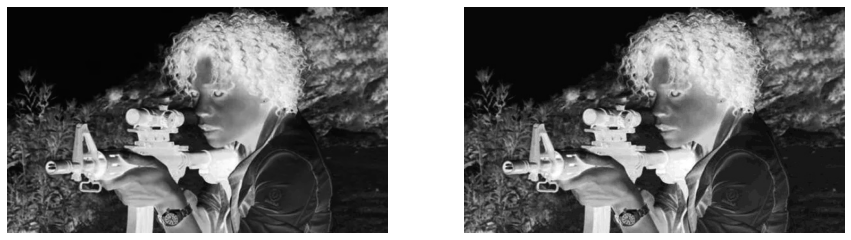

In [ ]:
mp_orig = cv2.imread(os.path.join(IMAGES_FOLDER_PATH1, "moneypenny.webp"))
mp_corr = cv2.imread(os.path.join(IMAGES_FOLDER_PATH1, "moneypenny_corrupt.jpg"))
mp_test = 255 - cv2.cvtColor(mp_orig, cv2.COLOR_BGR2GRAY)
fig1, axes1 = plt.subplots(1,2,figsize=(15,15))
# cv2_imshow(mp_test)
axes1[0].imshow(mp_test, cmap='gray')
axes1[0].axis('off')
axes1[1].imshow(mp_corr)
axes1[1].axis('off')

In [ ]:
img6 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "quantum_bad.jpg"))
# cv2_imshow(img6)


In [ ]:
def linContrastStretching(im, a, b):
    mn = np.amin(im)
    mx = np.amax(im)
    im1 = im.astype(np.float32)
    img = (im1 - mn) * (b - a) * 1.0 / (mx - mn)
    img = img + a
    img = np.round(img, decimals=0)
    return img.astype(np.uint8)

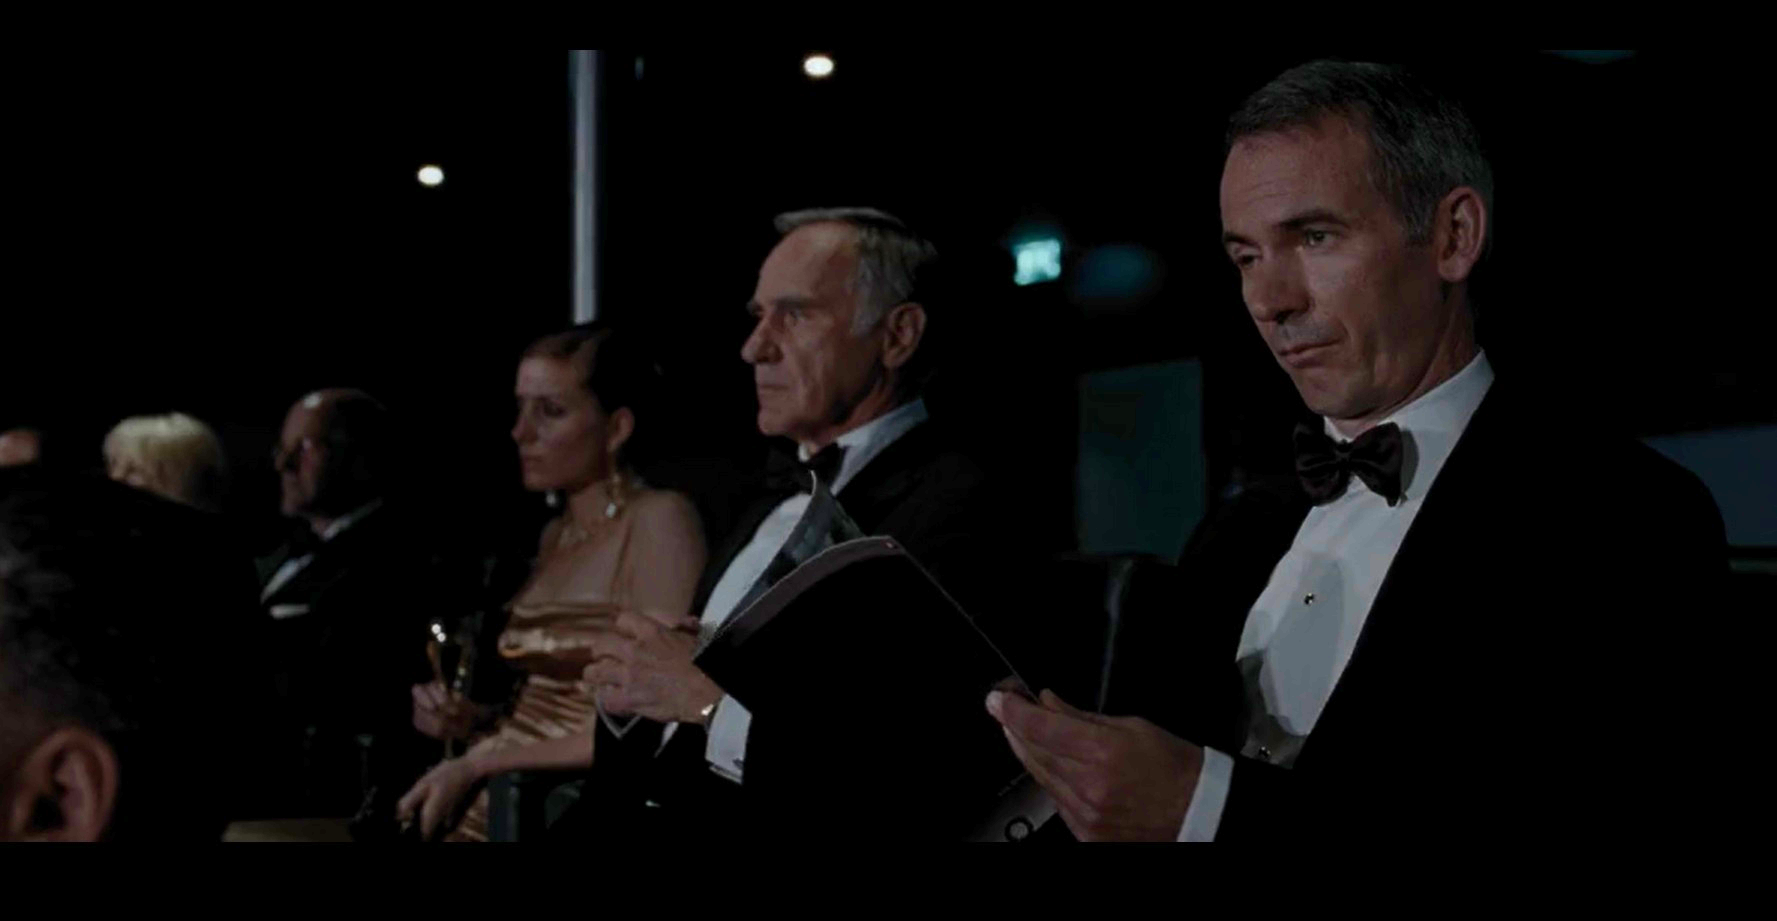

In [ ]:
img7 = linContrastStretching(img6 , 0,255)
cv2_imshow(img7)

In [89]:
def histEqualization(im):
  ro , col = im.shape
  # print(im.shape)
  prob = np.zeros(256)
  for i in range(256):
    # if(i < 20):
    prob[i] = (im <= i).sum() * 1.0 / (ro * col * 1.0)
  img = np.round(255.0 * prob[im])
  return img.astype(np.uint8)


(667, 1000)


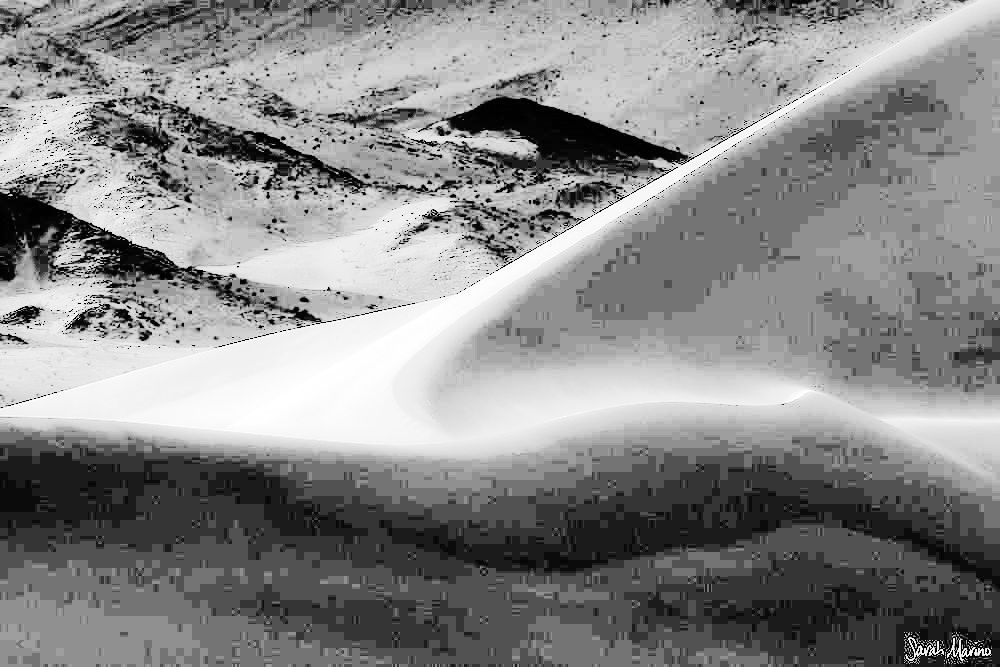

In [ ]:
img6 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH1, "practice_range1.jpg") , cv2.IMREAD_GRAYSCALE)
img7 = histEqualization(img6)
cv2_imshow(img7)

In [91]:
def histMatching(im,im1):
  ro , col = im1.shape
  im_equal = histEqualization(im)
  prob = np.zeros(256)
  for i in range(256):
    prob[i] = ((im1 <= i).sum() * 1.0) / (ro * col)
  result = np.searchsorted(prob, im_equal / 255)
  return result.astype(np.uint8)


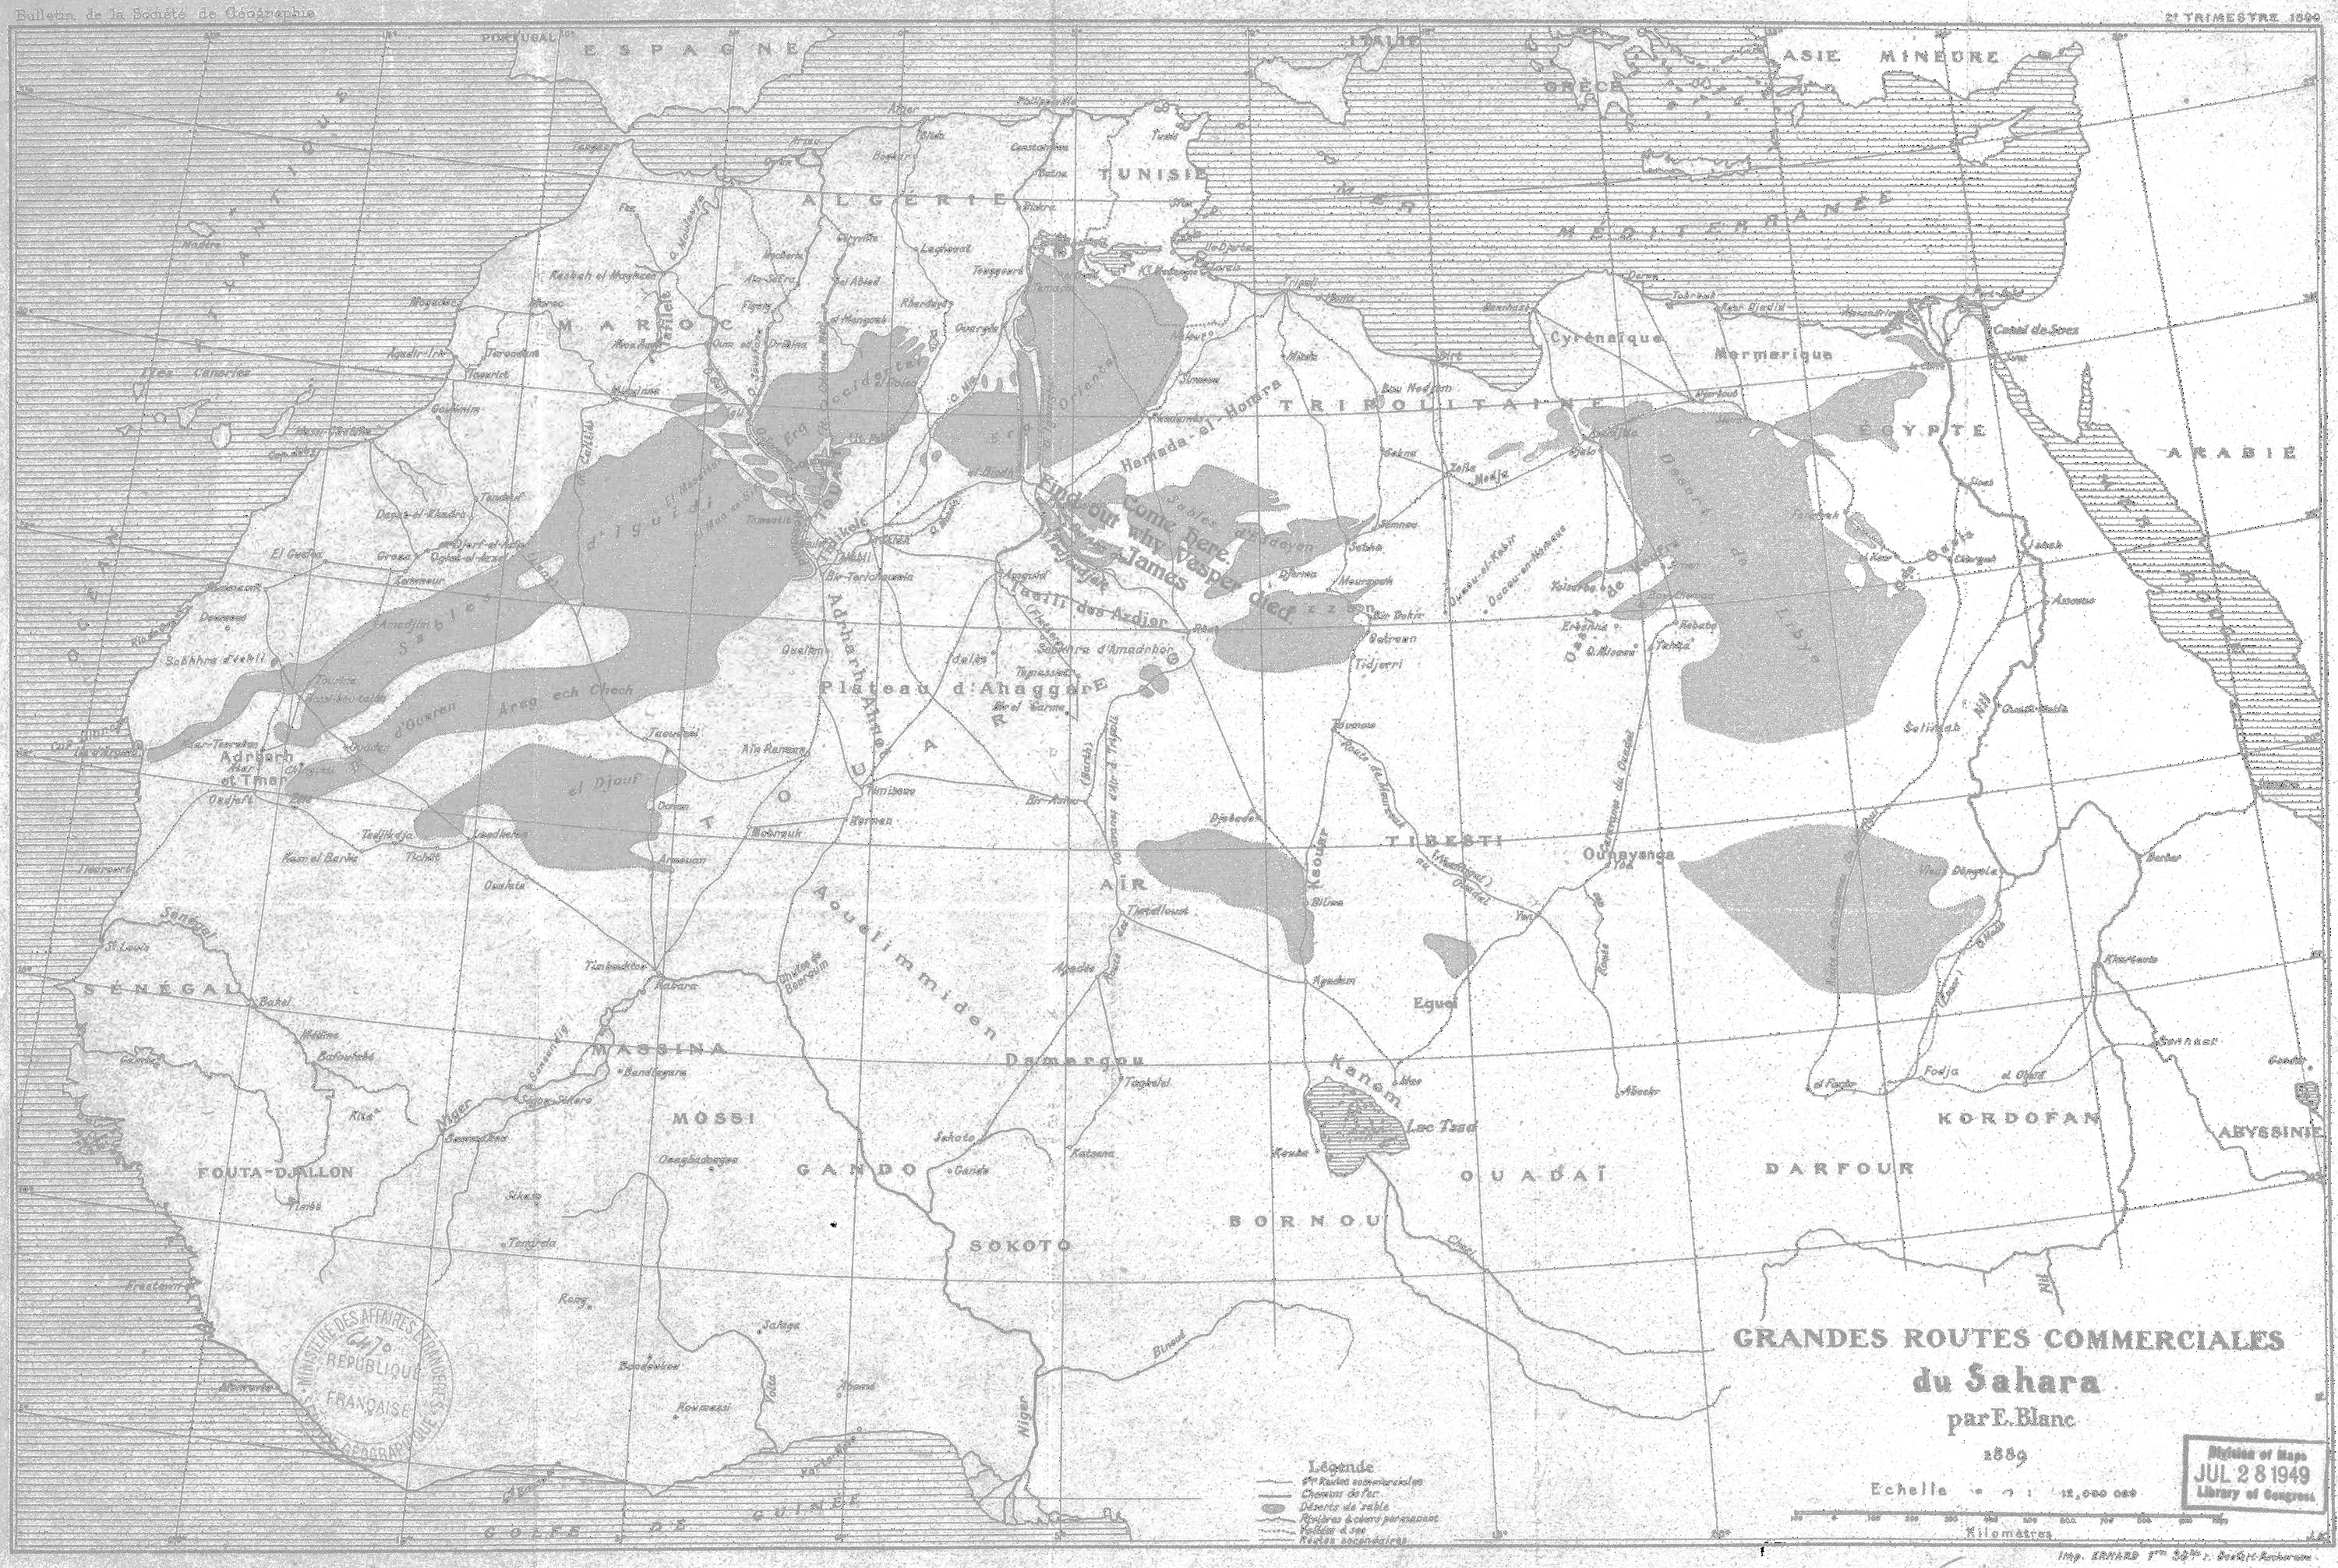

In [92]:
img8 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH1, "Map.jpg") , cv2.IMREAD_GRAYSCALE)
img9 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH1, "satellite_img.jpg") , cv2.IMREAD_GRAYSCALE)
img10 = histMatching(img8, img9)
cv2_imshow(img10)

In [11]:
def pixelwiseLinTransform(pix,k1,k2,a,b):
  if (pix >= a and pix <= b):
    return k1*pix + k2
  else :
    return pix

(-0.5, 1012.5, 1499.5, -0.5)

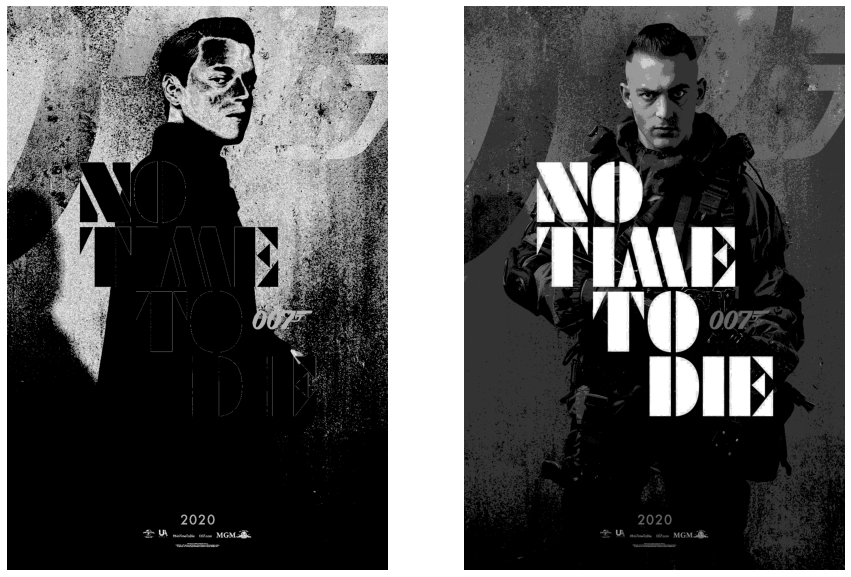

In [29]:
bondvill = cv2.imread(os.path.join(IMAGES_FOLDER_PATH1, "bondvillain1.jpg") , cv2.IMREAD_GRAYSCALE)
piecewiseLinTransform = np.vectorize(pixelwiseLinTransform) 
bondvill = bondvill / 255
bondlin = piecewiseLinTransform(bondvill,0,0,0,0.3)
bondlin = piecewiseLinTransform(bondlin,4/3,0,0.3,0.6)
bondlin = piecewiseLinTransform(bondlin,-2,2,0.6,0.8)
bondlin = piecewiseLinTransform(bondlin,0,0,0.8,1)
bondlin = bondlin * 255

bondvill1 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH1, "bondvillain2.jpg") , cv2.IMREAD_GRAYSCALE)
bondvill1 = bondvill1 / 255
bondlin1 = piecewiseLinTransform(bondvill1,0,0,0,0.2)
bondlin1 = piecewiseLinTransform(bondlin1,0,0.2,0.2,0.4)
bondlin1 = piecewiseLinTransform(bondlin1,0,0.4,0.4,0.6)
bondlin1 = piecewiseLinTransform(bondlin1,0,0.6,0.6,0.8)
bondlin1 = piecewiseLinTransform(bondlin1,0,0.8,0.8,0.997)
bondlin1 = bondlin1 * 255
fig2, axes2 = plt.subplots(1,2,figsize=(15,15))
# cv2_imshow(mp_test)
axes2[0].imshow(bondlin,cmap='gray')
axes2[0].axis('off')
axes2[1].imshow(bondlin1,cmap='gray')
axes2[1].axis('off')
# cv2_imshow(bondlin1)


(-0.05, 1.05, -0.04000000000000001, 0.8400000000000001)

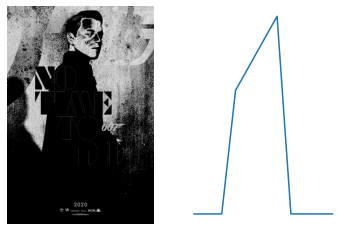

In [79]:
custom = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "custom-gray.jpg") , cv2.IMREAD_GRAYSCALE)
custom = custom / 255
custom1 = piecewiseLinTransform(custom,0,0,0,0.3)
custom1 = piecewiseLinTransform(custom1,1,0.2,0.3,0.6)
custom1 = piecewiseLinTransform(custom1,0,0,0.6,1)

x = np.arange(0,1.1,0.1)
y = np.zeros(11)
for i in range(3,7):
  y[i] = x[i] + 0.2

# print(y)
# plt.imshow(custom1,cmap='gray')
fig3, axes3 = plt.subplots(1,2)
# cv2_imshow(mp_test)
axes3[0].imshow(bondlin,cmap='gray')
axes3[0].axis('off')
axes3[1].plot(x,y)
axes3[1].axis('off')
# plt.plot(x,y)

In [34]:
def gammaTransform(img , gamma):
  imgn = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
  return imgn 

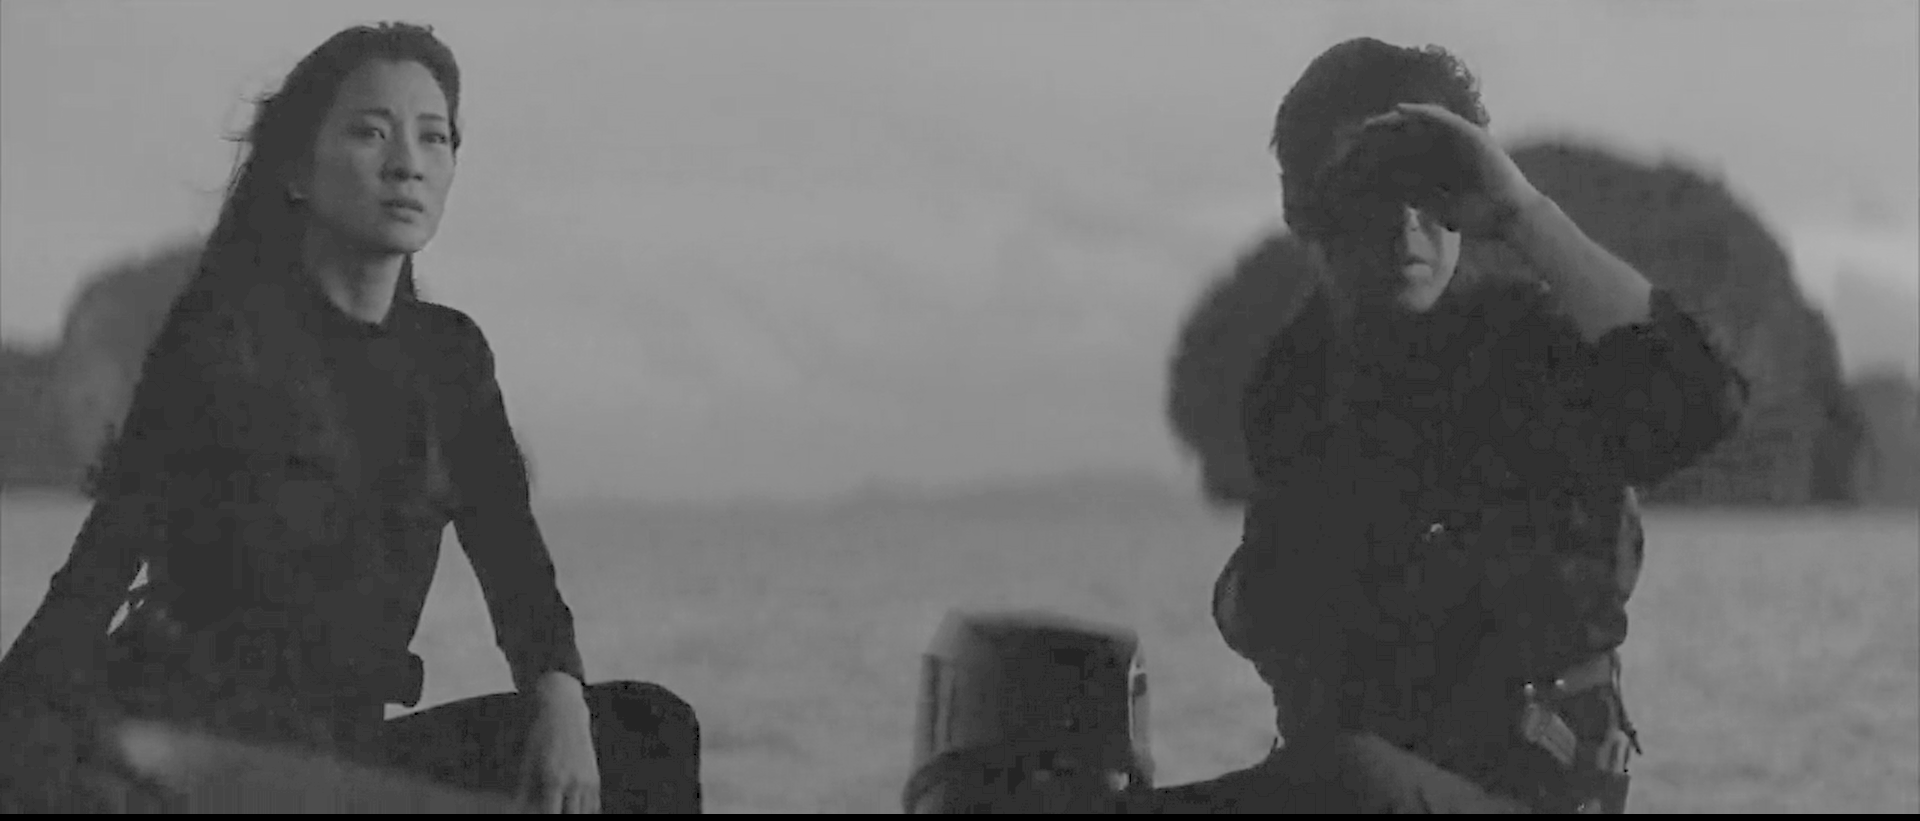

In [94]:
stealth = cv2.imread(os.path.join(IMAGES_FOLDER_PATH1, "stealth.png"))
stealth_ill =  gammaTransform(cv2.cvtColor(stealth, cv2.COLOR_BGR2GRAY) , 0.4)
cv2_imshow(stealth_ill)

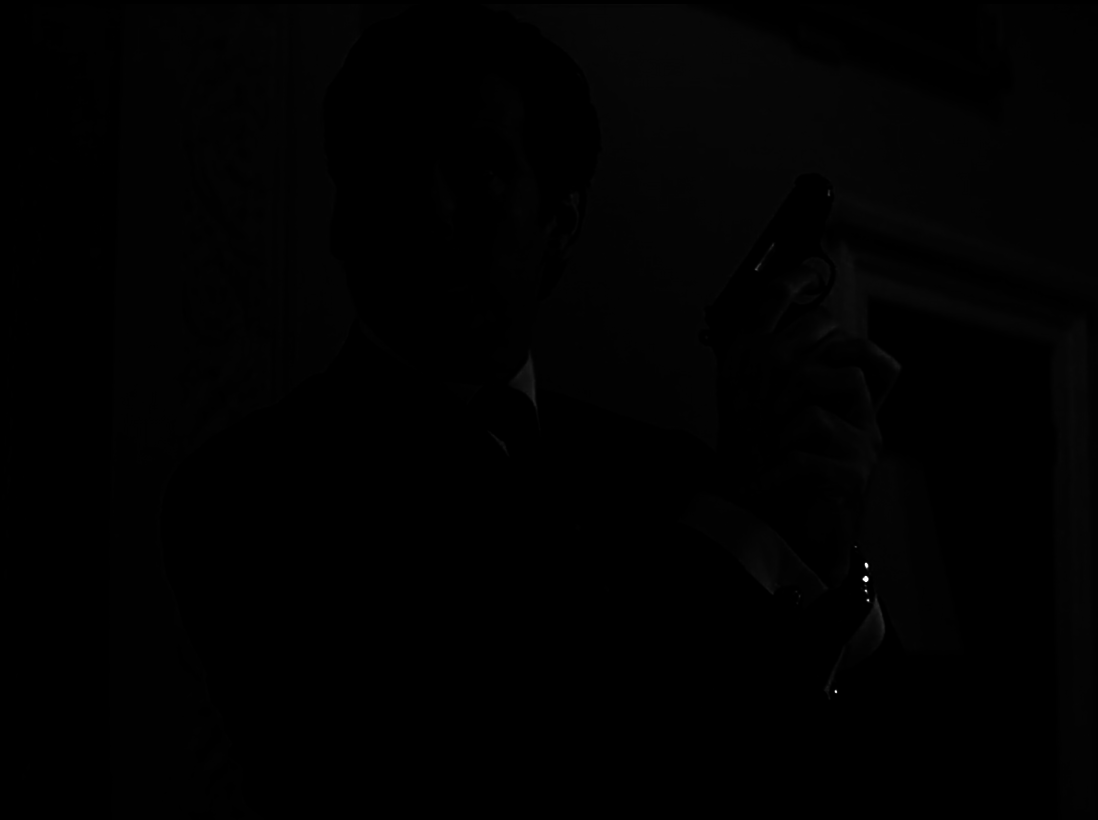

In [93]:
unstealth = cv2.imread(os.path.join(IMAGES_FOLDER_PATH1, "unstealth.png"))
unstealth_ill = gammaTransform( cv2.cvtColor(unstealth , cv2.COLOR_BGR2GRAY),4)
# unstealth_ill = gammaTransform(unstealth , 4)
cv2_imshow(unstealth_ill)

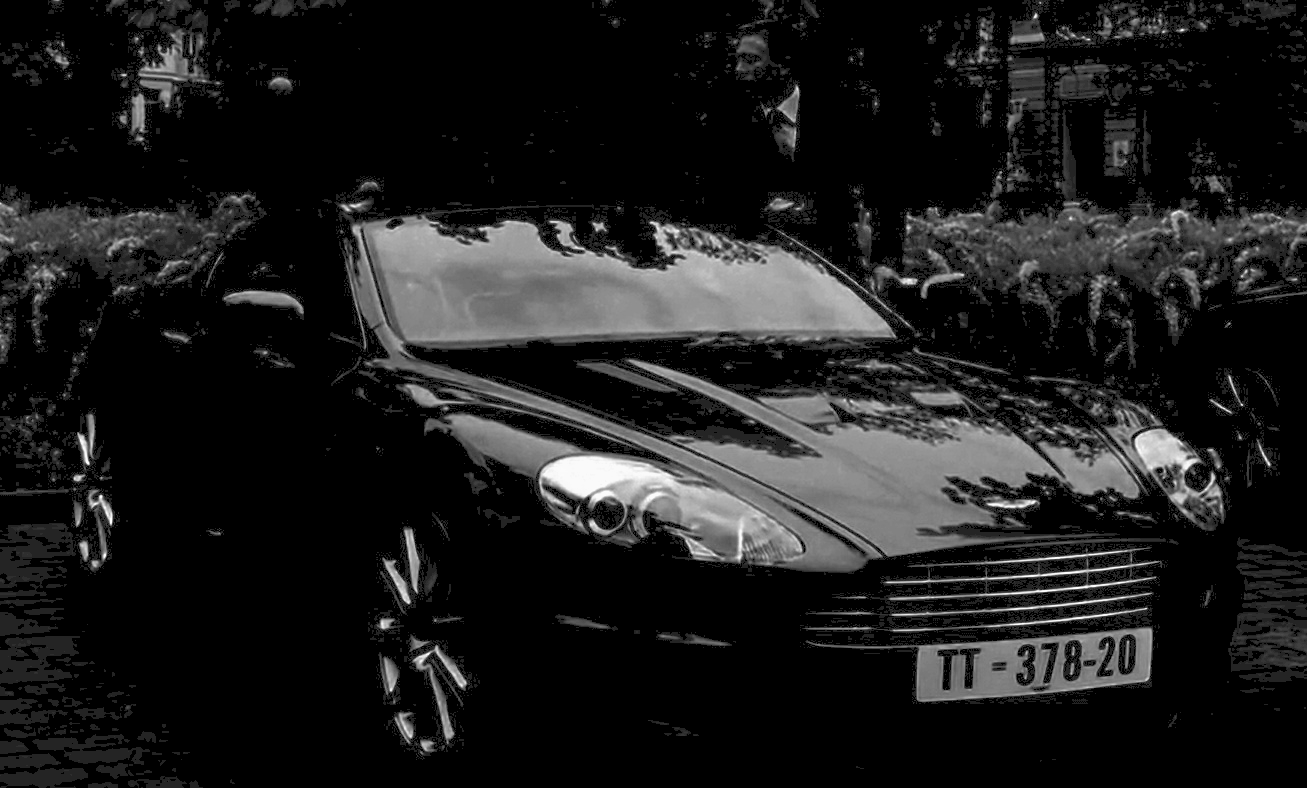

In [118]:
# ashton = cv2.imread(os.path.join(IMAGES_FOLDER_PATH1, "aston_invisible.jpg"),cv2.IMREAD_GRAYSCALE)
# ashton_ill = gammaTransform(ashton , 0.35)
# cv2_imshow(ashton_ill)
ashton = cv2.imread(os.path.join(IMAGES_FOLDER_PATH1, "aston_invisible.jpg"))
ashton_ill = gammaTransform( cv2.cvtColor(ashton , cv2.COLOR_BGR2GRAY),0.35)
# unstealth_ill = gammaTransform(unstealth , 4)
cv2_imshow(ashton_ill)

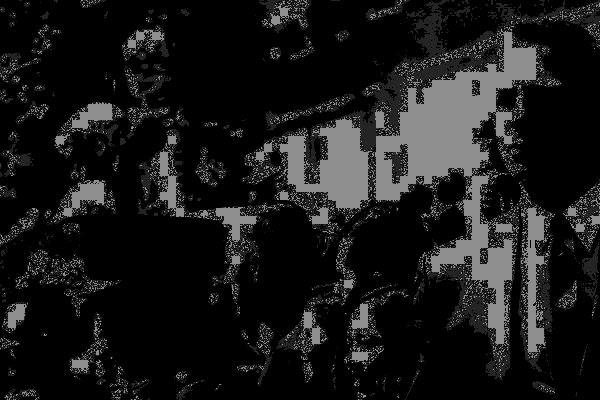

In [119]:
IMAGES_FOLDER_PATH2 = "/content/drive/My Drive/Assignment_1_Secret_Resource"
james1 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH2, "james1.jpg"))
james2 = histMatching(cv2.cvtColor(james1 , cv2.COLOR_BGR2GRAY),unstealth_ill)
cv2_imshow(james2)